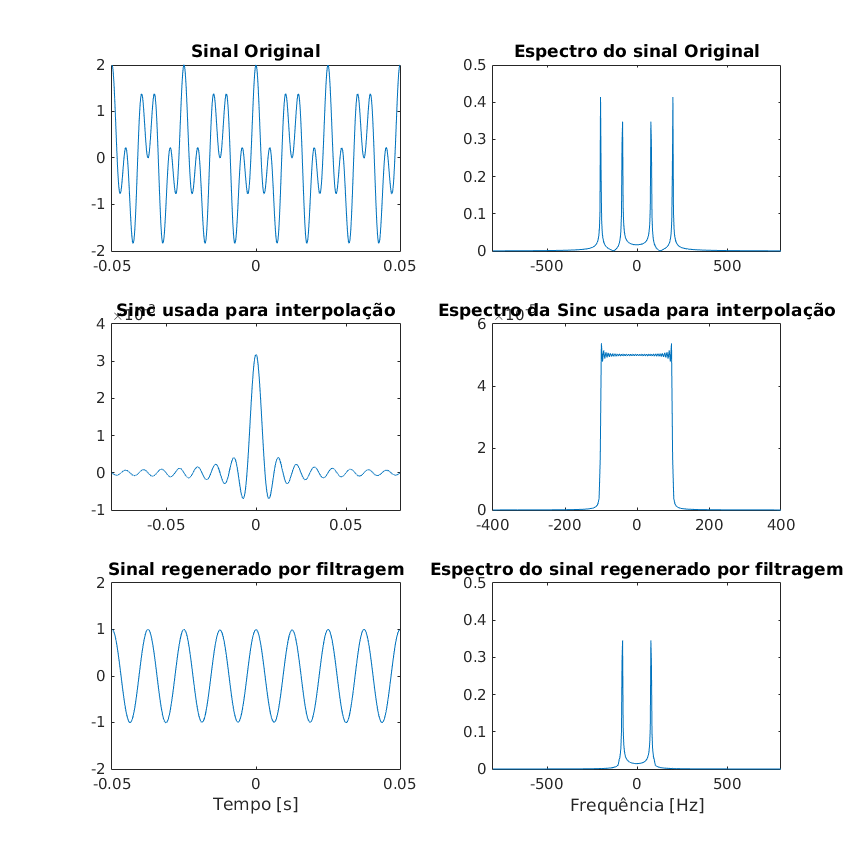

In [1]:
clear all;clc;close all;
%% Parâmetros da Sinc
B=100;                                                      % Banda do filtro
Ts=1/(200*pi*B);                                            % Taxa de geração (Passo no tempo)
Fs=1/Ts;                                                    % Frequência de amostragem
N=10000;                                                    % Número de amostras
tf=N*Ts;                                                    % Tempo final
t=-tf:Ts:tf;                                                % Eixo do tempo
Am=2*Ts*B;                                                  % Amplitude do sinal
s= Am*sinc(2*B*t);                                          % Sinc para reconstrução no tempo
m=cos(2*pi*200*t)+cos(2*pi*80*t);                           % Sinal m(t)

%% Convolução
c=conv(s,m);                                                % Calcula a convolução e realiza a filtragem no tempo
c=c(1,(length(t)-1)/2:3*(length(t)-1)/2);                   % Ajusta o tamanho do vetor
    
%% Espectros de frequência
lfft=length(s);                                             % Comprimento da FFT
S=fftshift(fft(s,lfft)/lfft);                               % Sinc S(f)
M=fftshift(fft(m,lfft)/lfft);                               % Sinal M(f) 
C=fftshift(fft(c,lfft)/lfft);                               % Sinal M(f) 
freq= -Fs/2:Fs/lfft:Fs/2-Fs/lfft;                           % Eixo da frequência

%% Gráficos 
% Plot do Sinal no tempo
fig = figure;
subplot(3,2,1);                                      
plot(t,m);
title('Sinal Original');
axis([-0.05 0.05 -2 2]);
% Plot do Sinal na frequência                   
subplot(3,2,2);
plot(freq,abs(M));        
title('Espectro do sinal Original');
axis([-800 800 0 0.5]);
%------------------------------------
% Plot do Sinc no tempo
subplot(3,2,3);                                      
plot(t,s);
title('Sinc usada para interpolação');
axis([-0.08 0.08 -1e-3 4e-3]);
% Plot do Sinc na frequência                   
subplot(3,2,4);
plot(freq,abs(S));       
title('Espectro da Sinc usada para interpolação');
axis([-400 400 0 6e-5]);
%------------------------------------
% Plot da convolução no tempo                                
subplot(3,2,5);
plot(t,c);      
title('Sinal regenerado por filtragem');
xlabel('Tempo [s]');
axis([-0.05 0.05 -2 2]);
% Plot da convolução na frequência   
subplot(3,2,6);
plot(freq,abs(C));
title('Espectro do sinal regenerado por filtragem');
xlabel('Frequência [Hz]');
axis([-800 800 0 0.5]);

fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 9 9];

Mesma descrição em Python.

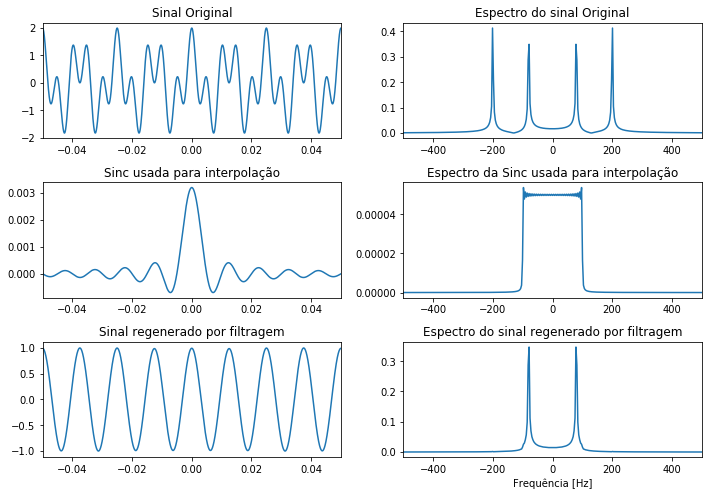

In [2]:
from scipy.fftpack import fft, fftshift
import numpy as np
from matplotlib import pyplot as plt

## Parâmetros da Sinc
B=100                                                      # Banda do filtro
Ts=1/(200*np.pi*B)                                         # Taxa de geração (Passo no tempo)
Fs=1/Ts                                                    # Frequência de amostragem
N=10000                                                    # Número de amostras
tf=N*Ts                                                    # Tempo final
t= np.arange(-tf,tf,Ts)                                    # Eixo do tempo
Am=2*Ts*B                                                  # Amplitude do sinal
s= Am*np.sinc(2*B*t)                                       # Sinc 
m=np.cos(2*np.pi*200*t)+np.cos(2*np.pi*80*t)               # Sinal m(t)

## Convolução
c=np.convolve(s,m)                                         # Calcula a convolução
c = c[(len(t))//2:3*(len(t))//2]                           # Ajusta o tamanho do vetor (/2)
## Espectros
lfft=len(s)                                                # Comprimento da FFT
S=fftshift(fft(s,lfft)/lfft)                               # Sinc S(f)
M=fftshift(fft(m,lfft)/lfft)                               # Sinal M(f) 
C=fftshift(fft(c,lfft)/lfft)                               # Sinal M(f) 
freq = np.arange(-Fs/2,Fs/2-Fs/lfft,Fs/lfft)               # Eixo da frequência
# Gráficos
plt.figure(1,[10,7])
plt.subplot(321)
plt.title("Sinal Original")
plt.plot(t,m)
plt.xlim([-0.05,0.05])
#
plt.subplot(322)
plt.title("Espectro do sinal Original")
plt.plot(freq,np.abs(M))
plt.xlim([-500,500])
#
plt.subplot(323)
plt.title("Sinc usada para interpolação")
plt.plot(t,s)
plt.xlim([-0.05,0.05])
#
plt.subplot(324)
plt.title("Espectro da Sinc usada para interpolação")
plt.plot(freq,np.abs(S))
plt.xlim([-500,500])
#
plt.subplot(325)
plt.title("Sinal regenerado por filtragem")
plt.plot(t,c)
plt.xlim([-0.05,0.05])
#
plt.subplot(326)
plt.title("Espectro do sinal regenerado por filtragem")
plt.plot(freq,np.abs(C))
plt.xlabel("Frequência [Hz]");
plt.xlim([-500,500])
#
plt.tight_layout(pad=1.1)
plt.show()

Para que retornemos ao sinal orignal (composto por duas senóides), precisamos 'alargar' o espectro da sinc de forma que ela contemple também a componente de maior frequência do sinal. Assim, aumentamos a banda B para 250Hz de forma a abarcar também a componente de 200Hz presente no sinal orginal.

Versão Matlab.

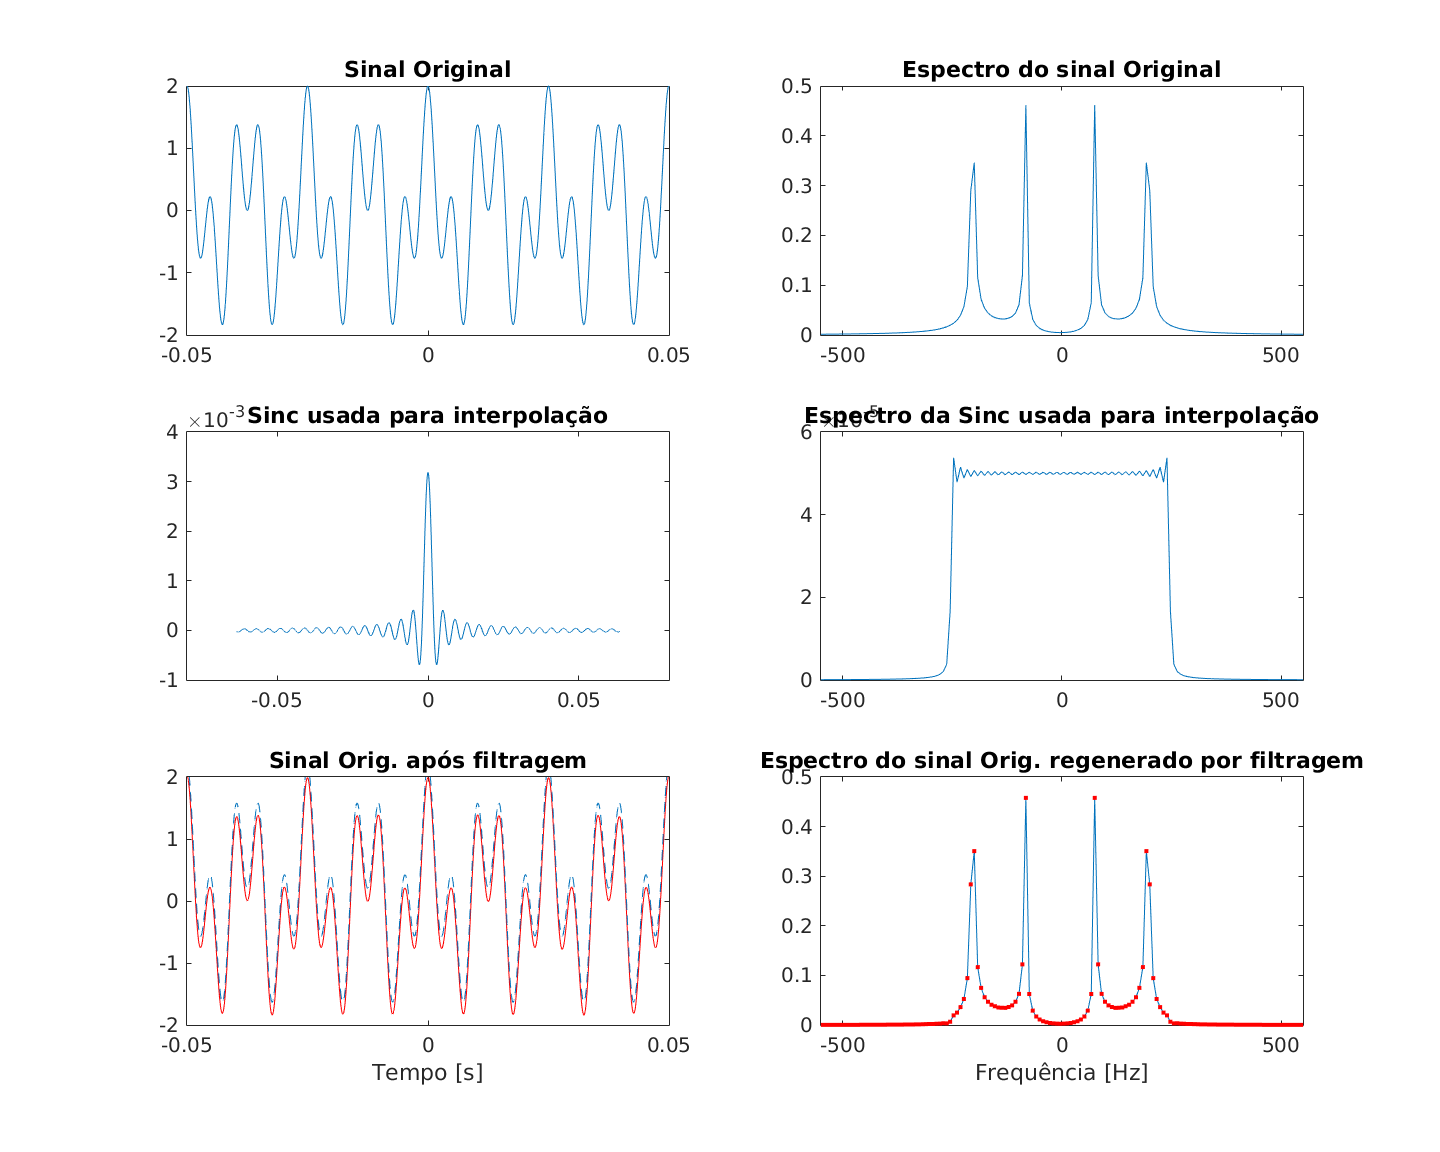

In [64]:
clear all;clc;close all;
%% Parâmetros da Sinc
B=250;                                                      % Banda do filtro
Ts=1/(200*pi*B);                                            % Taxa de geração (Passo no tempo)
Fs=1/Ts;                                                    % Frequência de amostragem
N=10000;                                                    % Número de amostras
tf=N*Ts;                                                    % Tempo final
t=-tf:Ts:tf;                                                % Eixo do tempo
Am=2*Ts*B;                                                  % Amplitude do sinal
s= Am*sinc(2*B*t);                                          % Sinc para reconstrução no tempo
m=cos(2*pi*200*t)+cos(2*pi*80*t);                           % Sinal m(t)

%% Convolução
c=conv(s,m);                                                % Calcula a convolução e realiza a filtragem no tempo
c=c(1,(length(t)-1)/2:3*(length(t)-1)/2);                   % Ajusta o tamanho do vetor
    
%% Espectros de frequência
lfft=length(s);                                             % Comprimento da FFT
S=fftshift(fft(s,lfft)/lfft);                               % Sinc S(f)
M=fftshift(fft(m,lfft)/lfft);                               % Sinal M(f) 
C=fftshift(fft(c,lfft)/lfft);                               % Sinal M(f) 
freq= -Fs/2:Fs/lfft:Fs/2-Fs/lfft;                           % Eixo da frequência

%% Gráficos 
% Plot do Sinal no tempo
fig = figure;
subplot(3,2,1);                                      
plot(t,m);
title('Sinal Original');
axis([-0.05 0.05 -2 2]);
% Plot do Sinal na frequência                   
subplot(3,2,2);
plot(freq,abs(M));        
title('Espectro do sinal Original');
axis([-550 550 0 0.5]);
%------------------------------------
% Plot do Sinc no tempo
subplot(3,2,3);                                      
plot(t,s);
title('Sinc usada para interpolação');
axis([-0.08 0.08 -1e-3 4e-3]);
% Plot do Sinc na frequência                   
subplot(3,2,4);
plot(freq,abs(S));       
title('Espectro da Sinc usada para interpolação');
axis([-550 550 0 6e-5]);
%------------------------------------
% Plot da convolução no tempo                                
subplot(3,2,5);                                  %Gráficos sobrepostos 
plot(t,c,'r',t,m+0.2,'--');                              %para melhor comparação
title('Sinal Orig. após filtragem');
xlabel('Tempo [s]');
axis([-0.05 0.05 -2 2]);
% Plot da convolução na frequência   
subplot(3,2,6);                                  %Gráficos sobrepostos 
plot(freq,abs(C),freq,abs(C),'r.');              %para melhor comparação
title('Espectro do sinal Orig. regenerado por filtragem');
xlabel('Frequência [Hz]');
axis([-550 550 0 0.5]);

fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 15 12];

No penúltimo gráfico ("Sinal Orig.após filtragem") foi feito um deslocamento na plotagem apenas para melhor evidenciar que ambas linhas se comportam igualmente, de forma a melhorar a vizualização uma vez que ambas estavam se sobrepondo por completo. 

Versão Python

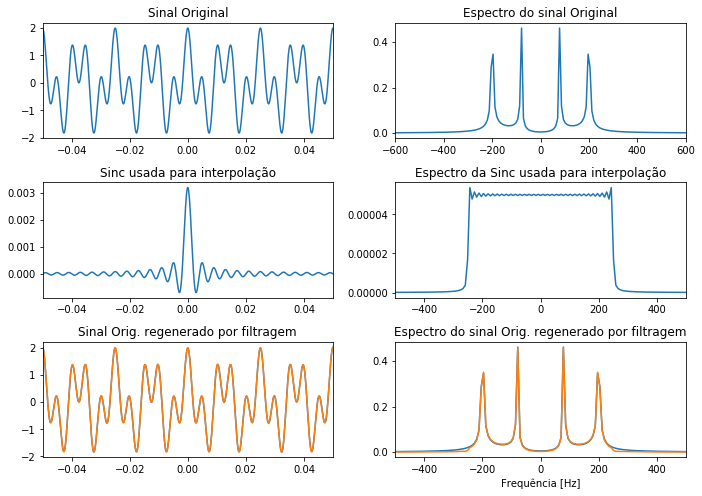

In [10]:
from scipy.fftpack import fft, fftshift
import numpy as np
from matplotlib import pyplot as plt

## Parâmetros da Sinc
B=250                                                     # Banda do filtro
Ts=1/(200*np.pi*B)                                         # Taxa de geração (Passo no tempo)
Fs=1/Ts                                                    # Frequência de amostragem
N=10000                                                    # Número de amostras
tf=N*Ts                                                    # Tempo final
t= np.arange(-tf,tf,Ts)                                    # Eixo do tempo
Am=2*Ts*B                                                  # Amplitude do sinal
s= Am*np.sinc(2*B*t)                                       # Sinc 
m=np.cos(2*np.pi*200*t)+np.cos(2*np.pi*80*t)               # Sinal m(t)

## Convolução
c=np.convolve(s,m)                                         # Calcula a convolução
c = c[(len(t))//2:3*(len(t))//2]                           # Ajusta o tamanho do vetor (/2)
## Espectros
lfft=len(s)                                                # Comprimento da FFT
S=fftshift(fft(s,lfft)/lfft)                               # Sinc S(f)
M=fftshift(fft(m,lfft)/lfft)                               # Sinal M(f) 
C=fftshift(fft(c,lfft)/lfft)                               # Sinal M(f) 
freq = np.arange(-Fs/2,Fs/2,Fs/lfft)               # Eixo da frequência
# Gráficos
plt.figure(1,[10,7])
plt.subplot(321)
plt.title("Sinal Original")
plt.plot(t,m)
plt.xlim([-0.05,0.05])
#
plt.subplot(322)
plt.title("Espectro do sinal Original")
plt.plot(freq,np.abs(M))
plt.xlim([-600,600])
#
plt.subplot(323)
plt.title("Sinc usada para interpolação")
plt.plot(t,s)
plt.xlim([-0.05,0.05])
#
plt.subplot(324)
plt.title("Espectro da Sinc usada para interpolação")
plt.plot(freq,np.abs(S))
plt.xlim([-500,500])
#
plt.subplot(325)
plt.title("Sinal Orig. regenerado por filtragem")
plt.plot(t,m)                             #Gráficos sobrepostos 
plt.plot(t,c)                             #para melhor comparação
plt.xlim([-0.05,0.05])
#
plt.subplot(326)
plt.title("Espectro do sinal Orig. regenerado por filtragem")
plt.plot(freq,np.abs(M))                  #Gráficos sobrepostos 
plt.plot(freq,np.abs(C))                  #para melhor comparação
plt.xlabel("Frequência [Hz]");
plt.xlim([-500,500])
#

plt.tight_layout(pad=1.1)
plt.show()

A SQNR =  12.8071304674 decibéis, com L = 4 níveis
A SQNR =  19.0874980238 decibéis, com L = 8 níveis
A SQNR =  25.2901863276 decibéis, com L = 16 níveis
A SQNR =  37.2780266928 decibéis, com L = 64 níveis
A SQNR =  48.6862631231 decibéis, com L = 256 níveis


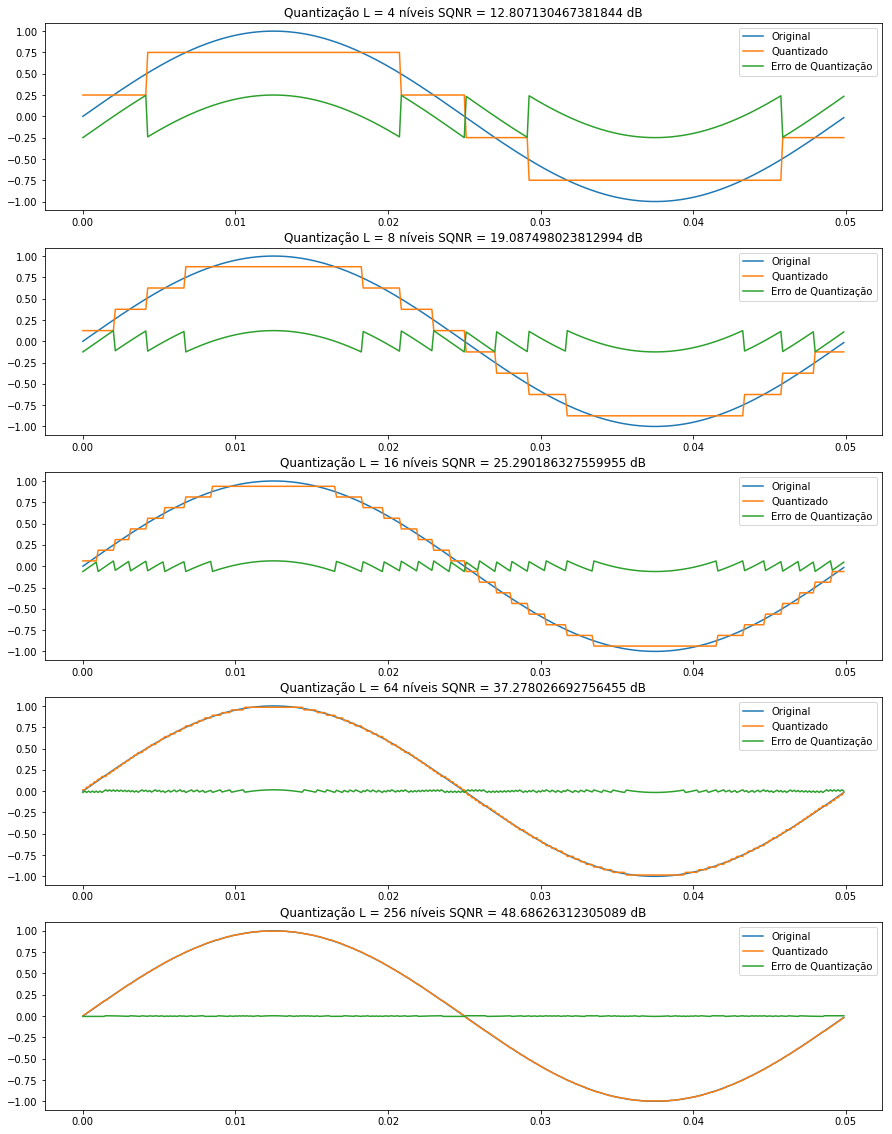

In [6]:
import numpy as np
import matplotlib.pyplot as plt
fs=8000                                              # Frequência de amostragem
Ts=1/fs                                              # Período de amostragem
fm=20                                                # Frequência da onda
Tm=1/fm                                              # Período de amostragem
t= np.arange(0,Tm,Ts)                                # Eixo do tempo
m_t=np.sin(2*np.pi*fm*t)                             # Sinal m(t)
L= [ 4, 8, 16, 64, 256 ];                                 # Níveis de quantização
sig_max=max(m_t)                                     # Encontra pico máximo
sig_min=min(m_t)                                     # Encontra pico mínimo
plt.figure(1,[15,20])
# Quantização com round() para cada nível de quantização especificado
for il in range(0,len(L)):
    Li = L[il]
    Delta=(sig_max-sig_min)/Li                       # Intervalo de quantização (distância entre um nível e outro)
    q_level=np.arange(sig_min+Delta/2,sig_max,Delta) # Vetor com as amplitudes dos Q níveis (Ex: nível 4 -- q_level(4)= -0.05V)

    sigp=m_t-sig_min                                 # Deixa o sinal somente com amplitudes positivas (shift para cima)
    # Calcula a quantidade de nívels (não inteiro ainda) de cada amostra (elementos >= 0)
    sigp=sigp*(1/Delta)                                
    sigp=sigp + 1/2 +0.0001                          # Tira elementos do zero 
    # Agora que nenhum valor do sinal  é zero nem negativo:
    qindex=np.round(sigp)                            # Encontra inteiro mais proximo para cada elemento
    qindex[qindex>Li] = Li                           # Trunca o excedente de qindex 
    qindex = qindex.astype(int)                      # Casting para inteiro (garantindo que é do tipo inteiro)
    q_out=q_level[abs(qindex-1)]                     # Distribui nos níveis cada elemento 
    
    erro=m_t-q_out
    N =len(erro)
    N1=len(m_t) 
    P_erro =(np.linalg.norm(erro)**2)/N 
    P_m_t =(np.linalg.norm(m_t)**2)/N 
    SQNR=P_m_t/P_erro
    SQNR_db=10*np.log10(SQNR)
    print('A SQNR = ',SQNR_db, 'decibéis, com L =',Li,'níveis')    
    
    ## Plotting
    plt.subplot('{}1{}'.format(len(L),il+1))
    plt.plot(t,m_t,t,q_out,t,(erro))
    plt.title('Quantização L = {} níveis SQNR = {} dB'.format(Li,SQNR_db))
    plt.legend(["Original", "Quantizado", "Erro de Quantização"])
    
plt.show()
       

Níveis de quantização = 4 com SQNR =  12.8071
Níveis de quantização = 8 com SQNR =  19.0875
Níveis de quantização = 16 com SQNR =  25.2902
Níveis de quantização = 64 com SQNR =  37.278
Níveis de quantização = 256 com SQNR =  48.6863


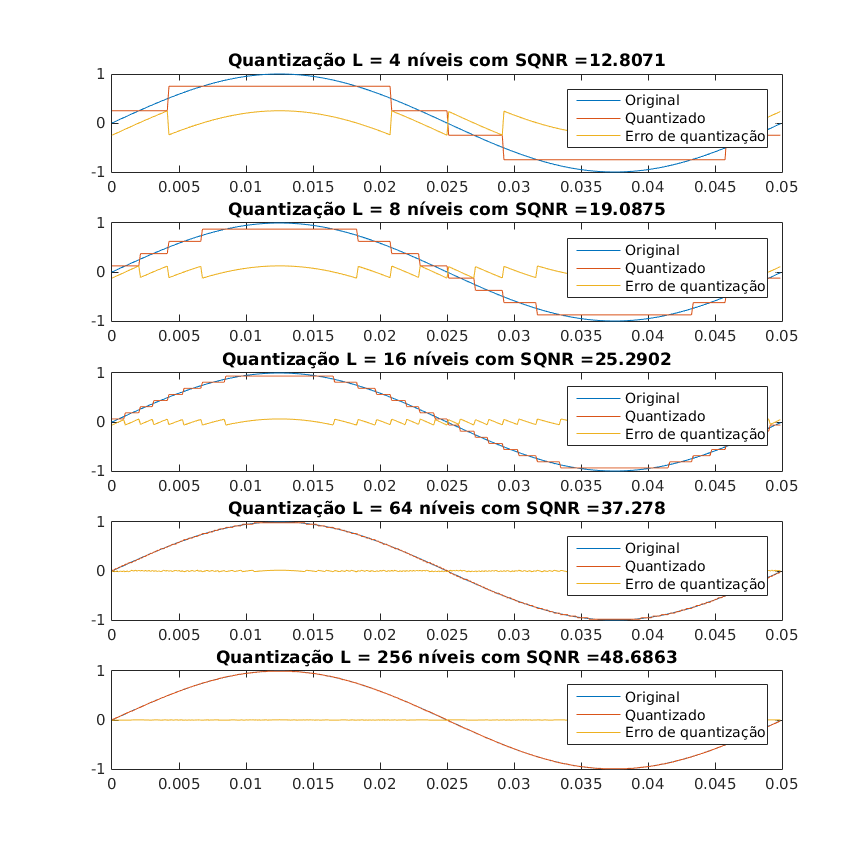

In [1]:
clc; clear all;close all;
%% Parâmetros
fs=8000;                                            % Frequência de amostragem
Ts=1/fs;                                            % Período de amostragem
fm=20;                                              % Frequência da onda
Tm=1/fm;                                            % Período de amostragem
t=0:Ts:Tm-Ts;                                       % Eixo do tempo
m_t=sin(2*pi*20*t);                                 % Sinal m(t)
L= [ 4 8 16 64 256];                                   % Vetor com níveis de quantização

sig_max=max(m_t);                                   % Encontra pico máximo
sig_min=min(m_t);                                   % Encontra pico mínimo
%% Quantização com round() para cada nível de quantização especificado
fig = figure;
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 9 9];
for il = 1:length(L)
    Li = L(il);
    Delta=(sig_max-sig_min)/Li;                     % Intervalo de quantização (separação entre um nível e outro)
    q_level=sig_min+Delta/2:Delta:sig_max-Delta/2;  % Vetor com amplitudes dos Q níveis (Ex: nível 4 -- q_level(4)= -0.05V)
    %
    sigp=m_t-sig_min;                               % Deixa o sinal somente com amplitudes positivas (shift para cima)
    % Calcula a quantidade de nívels (não inteiro ainda) de cada amostra (elementos >= 0)
    sigp=sigp*(1/Delta);                            
    sigp=sigp+1/2;                                  % Tira elementos do zero
    % Agora que nenhum valor do sinal agora é zero nem negativo: isso é importante para que o vetor comece de 1
    qindex=round(sigp);                             % Encontra inteiro mais proximo para cada elemento
    qindex=min(qindex,Li);                          % Trunca o excedente de qindex
    q_out=q_level(qindex);                          % Calcula a amplitude quantizada de cada amostra
    erro=m_t-q_out;
    N =length(erro);
    N1=length(m_t) ;
    P_erro =(norm(erro)^2)/N; 
    P_m =(norm(m_t)^2)/N1; 
    SQNR=P_m/P_erro;
    SQNR_db=10*log10(SQNR);
    
    disp(['Níveis de quantização = ' num2str(Li) ' com SQNR =  ' num2str(SQNR_db)]);

    % Gráficos
    subplot(length(L),1,il)
    plot (t,m_t,t,q_out,t,(m_t-q_out));
    legend('Original', 'Quantizado','Erro de quantização');
    title(['Quantização L = ' num2str(Li) ' níveis com SQNR =' num2str(SQNR_db)]);
end

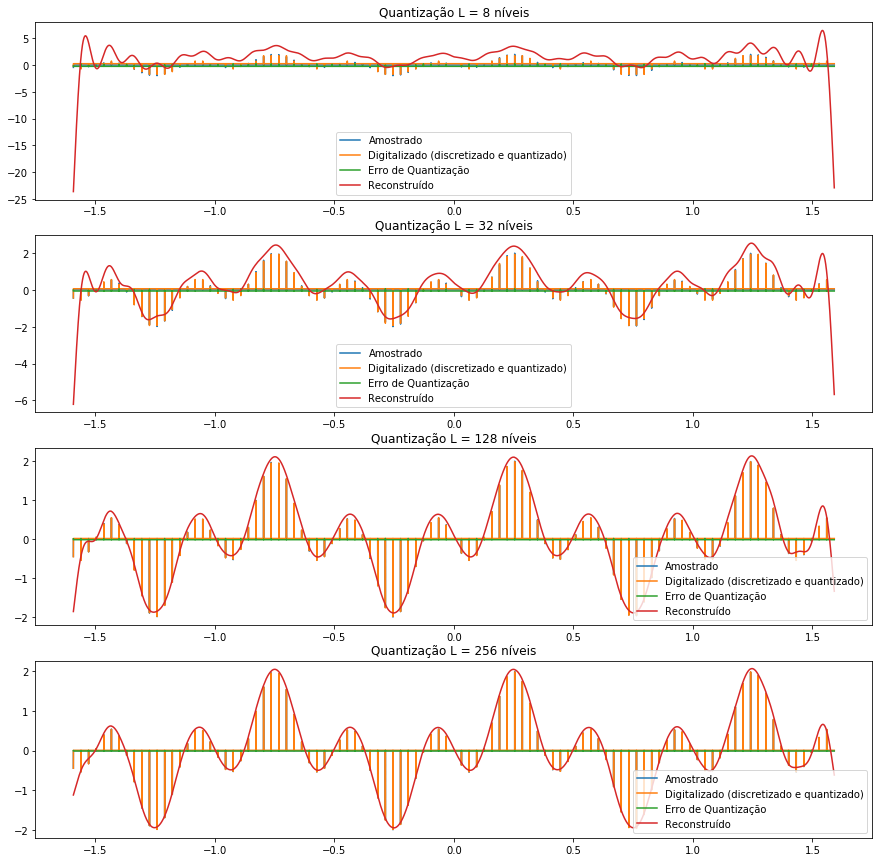

In [2]:
# Parâmetros
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift

# Criação das funções, por questão de organização
def downsample(array,rate):
    return array[::rate]

def upsample(array,rate):
    from numpy import zeros
    ret =  zeros(rate*len(array))
    ret[::rate] = array 
    return ret


B=10                                                    # Banda do filtro
Ts=1/(200*np.pi*B)                                      # Taxa de geração (Passo no tempo)
Fs1=1/Ts                                                # Frequência de amostragem
T=0.002                                                 # Taxa de amostragem (500kHz)
N=10000                                                 # Número de amostras
Tf=N*Ts                                                 # Tempo final
t= np.arange(-Tf,Tf,Ts)                                 # Definição do eixo do tempo      
fm1=3                                                   # Frequência senoide 1      
fm2=1                                                   # Frequência senoide 2
m_t=np.sin(2*np.pi*fm2*t)-np.sin(2*np.pi*fm1*t)         # Sinal mensagem m(t)
ts=0.02                                                 # Nova taxa de amostragem
N_samp=round(20*ts/T)                                   # Número de elementos 

Am=400*Ts*B                                                # Amplitude da sinc (ajustado de modo a conferir melhor filtragem)
s= Am*np.sinc(2*B*t)                                       # Sinc 

             
## Amostragem 
s_out=downsample(m_t,N_samp)                            # Coleta 1 amostra a cada N_samp=200 amostras do sinal  
s_out=upsample(s_out,N_samp)                            # Retorna vetor amostrado com o número inicial de elementos

             
L= [8, 32, 128, 256];                                  # Níveis de quantização
sig_max=max(s_out)                                     # Encontra pico máximo
sig_min=min(s_out)                                     # Encontra pico mínimo
plt.figure(1,[15,15])
# Quantização com round() para cada nível de quantização especificado
for il in range(0,len(L)):
    Li = L[il]
    Delta=(sig_max-sig_min)/Li                       # Intervalo de quantização (distância entre um nível e outro)
    q_level=np.arange(sig_min+Delta/2,sig_max,Delta) # Vetor com as amplitudes dos Q níveis (Ex: nível 4 -- q_level(4)= -0.05V)

    sigp=s_out-sig_min                                 # Deixa o sinal somente com amplitudes positivas (shift para cima)
    # Calcula a quantidade de nívels (não inteiro ainda) de cada amostra (elementos >= 0)
    sigp=sigp*(1/Delta)                                
    sigp=sigp + 1/2 +0.0001                          # Tira elementos do zero 
    # Agora que nenhum valor do sinal  é zero nem negativo:
    qindex=np.round(sigp)                            # Encontra inteiro mais proximo para cada elemento
    qindex[qindex>Li] = Li                           # Trunca o excedente de qindex 
    qindex = qindex.astype(int)                      # Casting para inteiro (garantindo que é do tipo inteiro)
    q_out=q_level[abs(qindex-1)]                     # Distribui nos níveis cada elemento 
    erro=s_out-q_out;
                 
    ## Convolução
    c=np.convolve(s,q_out)                                           # Calcula a convolução
    c = c[(len(t))//2:3*(len(t))//2]                                 # Ajusta o tamanho do vetor (/2)
    fator_de_correção = 384/Li;                                      # Fator de correção para baixar o ajustar o offset do sinal reconstruído
    
    ## Plotting
    plt.subplot('{}1{}'.format(len(L),il+1))
    plt.plot(t,s_out,t,q_out,t,erro,t,c-fator_de_correção)
    plt.title('Quantização L = {} níveis'.format(Li))
    plt.legend(["Amostrado", "Digitalizado (discretizado e quantizado)", "Erro de Quantização","Reconstruído"])
    
plt.show()


Tempo de execução da implementação matricial = 0.011103
Sinais qindex_1 e sig_rec01 iguais: decodificação realizada com sucesso!
Sinais qindex_2 e sig_rec02 iguais: decodificação realizada com sucesso!
Sinais qindex_3 e sig_rec03 iguais: decodificação realizada com sucesso!
Sinais qindex_4 e sig_rec04 iguais: decodificação realizada com sucesso!
Sinais qindex_5 e sig_rec05 iguais: decodificação realizada com sucesso!


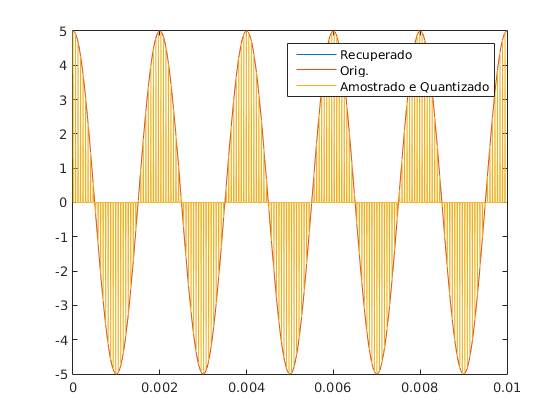

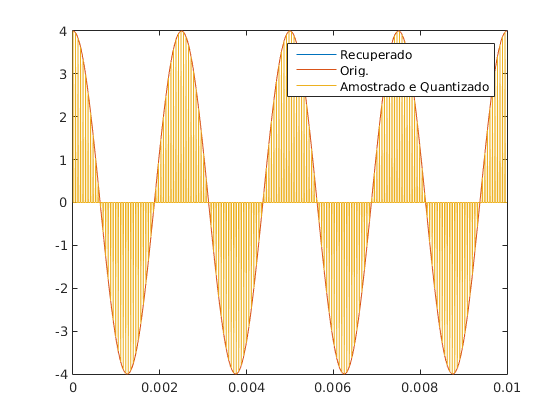

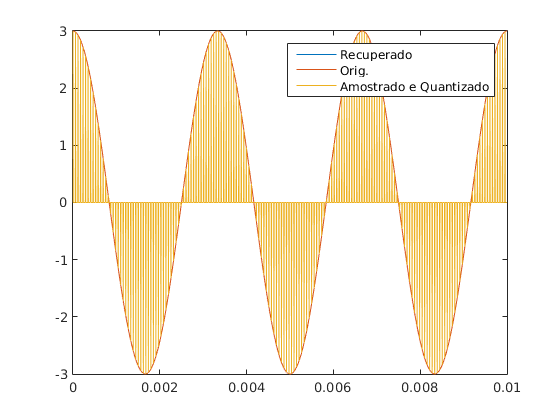

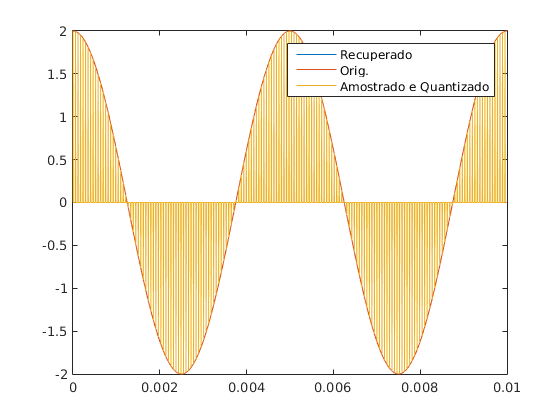

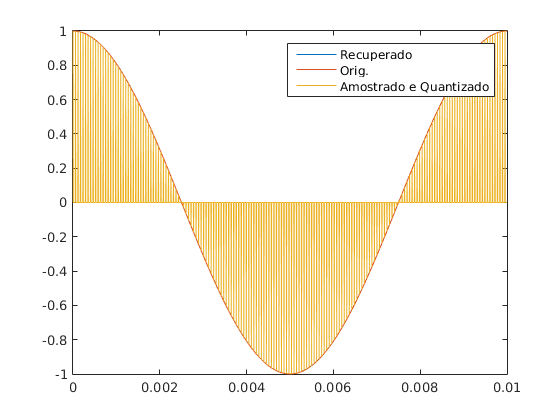

In [5]:
clear;

close all;

%% Parâmetros dos sinais
%Ts=1/Fs;                  %esses parametros não me fizeram nenhum sentido
%                                                =/
%Tf=1;
B=550;
Ts=1/(200*pi*B);                                            % Taxa de geração (Passo no tempo)
Fs=1/Ts;                                                    % Frequência de amostragem
N=30000;                                                    % Número de amostras
tf=N*Ts;                                                    % Tempo final
t=-tf:2*Ts:tf-Ts;                                           % Eixo do tempo
Am=40*Ts*B;                              %ajuste em 40      % Amplitude do sinal
s= 1*Am*sinc(2*B*t);                                          % Sinc para reconstrução no tempo

% s2= 1*Am*sinc(2*B*t); 
% s3= 1*Am*sinc(2*B*t); 
% s4= 1*Am*sinc(2*B*t); 
% s5= 1*Am*sinc(2*B*t); 

%t= -1:2/length(sinal_1):1-1/length(sinal_1); %vetor criado para plotagem 

% Neste experimento os sinais devem ter a mesma amplitude, pois a
% quantização é feita sem ajuste da amplitude (por simplicidade)
% A = 10; 
f1=100;
f2=200;
f3=300;
f4=400;
f5=500;

sinal01=1*cos(2*pi*f1*t);
sinal02=2*cos(2*pi*f2*t);
sinal03=3*cos(2*pi*f3*t);
sinal04=4*cos(2*pi*f4*t);
sinal05=5*cos(2*pi*f5*t);

% figure(1)
% plot(t,sinal01)
% axis([0 1/100 -1 1]);

% sinal01=sinal_1;
% sinal02=sinal_2;
% sinal03=sinal_3;
% sinal04=sinal_4;
% sinal05=sinal_5;

N_samp=10;

%% Codificador de sinais
% Ajustando sinal 01
n = 8;                                                  % Número de bits por nível
L= 2^n;                                                 % Níveis de quantização
%
%% Amostragem 
s_out_1=downsample(sinal01,N_samp);                           % Coleta 1 amostra a cada N_samp=10 amostras do sinal  
s_out_1=upsample(s_out_1,N_samp);                             % Retorna vetor amostrado com o numero inicial de elementos

s_out_2=downsample(sinal02,N_samp);                           % Coleta 1 amostra a cada N_samp=10 amostras do sinal  
s_out_2=upsample(s_out_2,N_samp);                             % Retorna vetor amostrado com o numero inicial de elementos

s_out_3=downsample(sinal03,N_samp);                           % Coleta 1 amostra a cada N_samp=10 amostras do sinal  
s_out_3=upsample(s_out_3,N_samp);                             % Retorna vetor amostrado com o numero inicial de elementos

s_out_4=downsample(sinal04,N_samp);                           % Coleta 1 amostra a cada N_samp=10 amostras do sinal  
s_out_4=upsample(s_out_4,N_samp);                             % Retorna vetor amostrado com o numero inicial de elementos

s_out_5=downsample(sinal05,N_samp);                           % Coleta 1 amostra a cada N_samp=10 amostras do sinal  
s_out_5=upsample(s_out_5,N_samp);                             % Retorna vetor amostrado com o numero inicial de elementos

%
%% Quantização e Codificação
% Ajustando sinal 01
sig_max_1=max(s_out_1);                                         % Encontra pico máximo
sig_min_1=min(s_out_1);                                         % Encontra pico mínimo
Delta_1=(sig_max_1-sig_min_1)/L;                                % Intervalo de quantização (separação entre um nível e outro)
q_level_1=sig_min_1+Delta_1/2:Delta_1:sig_max_1-Delta_1/2;      % Vetor com amplitudes dos Q níveis 
sigp_1=s_out_1-sig_min_1;                                       % Shift para cima
sigp_1=sigp_1*(1/Delta_1);                                      % Calcula a quantidade de nívels
sigp_1=sigp_1+1/2;                                              % Tira elementos do zero 
qindex_1=round(sigp_1);                                         % Encontra inteiro mais proximo para cada elemento
qindex_1=min(qindex_1,L);                                       % Remove o excedente de qindex 
q_out_1=q_level_1(qindex_1);                                    % Calcula a amplitude quantizada de cada amostra
sig_code01= de2bi(qindex_1-1);                                  % Transforma em sinal binário
%q_out=q_level[abs(qindex-1)]

% Ajustando sinal 02
sig_max_2=max(s_out_2);                                         % Encontra pico máximo
sig_min_2=min(s_out_2);                                         % Encontra pico mínimo
Delta_2=(sig_max_2-sig_min_2)/L;                                % Intervalo de quantização (separação entre um nível e outro)
q_level_2=sig_min_2+Delta_2/2:Delta_2:sig_max_2-Delta_2/2;      % Vetor com amplitudes dos Q níveis 
sigp_2=s_out_2-sig_min_2;                                       % Shift para cima
sigp_2=sigp_2*(1/Delta_2);                                      % Calcula a quantidade de nívels
sigp_2=sigp_2+1/2;                                              % Tira elementos do zero 
qindex_2=round(sigp_2);                                         % Encontra inteiro mais proximo para cada elemento
qindex_2=min(qindex_2,L);                                       % Remove o excedente de qindex 
q_out_2=q_level_2(qindex_2);                                    % Calcula a amplitude quantizada de cada amostra
sig_code02= de2bi(qindex_2-1);                                  % Transforma em sinal binário


% Ajustando sinal 03
sig_max_3=max(s_out_3);                                         % Encontra pico máximo
sig_min_3=min(s_out_3);                                         % Encontra pico mínimo
Delta_3=(sig_max_3-sig_min_3)/L;                                % Intervalo de quantização (separação entre um nível e outro)
q_level_3=sig_min_3+Delta_3/2:Delta_3:sig_max_3-Delta_3/2;      % Vetor com amplitudes dos Q níveis 
sigp_3=s_out_3-sig_min_3;                                       % Shift para cima
sigp_3=sigp_3*(1/Delta_3);                                      % Calcula a quantidade de nívels
sigp_3=sigp_3+1/2;                                              % Tira elementos do zero 
qindex_3=round(sigp_3);                                         % Encontra inteiro mais proximo para cada elemento
qindex_3=min(qindex_3,L);                                       % Remove o excedente de qindex 
q_out_3=q_level_3(qindex_3);                                    % Calcula a amplitude quantizada de cada amostra
sig_code03= de2bi(qindex_3-1);                                  % Transforma em sinal binário                    


% Ajustando sinal 04
sig_max_4=max(s_out_4);                                         % Encontra pico máximo
sig_min_4=min(s_out_4);                                         % Encontra pico mínimo
Delta_4=(sig_max_4-sig_min_4)/L;                                % Intervalo de quantização (separação entre um nível e outro)
q_level_4=sig_min_4+Delta_4/2:Delta_4:sig_max_4-Delta_4/2;      % Vetor com amplitudes dos Q níveis 
sigp_4=s_out_4-sig_min_4;                                       % Shift para cima
sigp_4=sigp_4*(1/Delta_4);                                      % Calcula a quantidade de nívels
sigp_4=sigp_4+1/2;                                              % Tira elementos do zero 
qindex_4=round(sigp_4);                                         % Encontra inteiro mais proximo para cada elemento
qindex_4=min(qindex_4,L);                                       % Remove o excedente de qindex 
q_out_4=q_level_4(qindex_4);                                    % Calcula a amplitude quantizada de cada amostra
sig_code04= de2bi(qindex_4-1);                                  % Transforma em sinal binário

% Ajustando sinal 05
sig_max_5=max(s_out_5);                                         % Encontra pico máximo
sig_min_5=min(s_out_5);                                         % Encontra pico mínimo
Delta_5=(sig_max_5-sig_min_5)/L;                                % Intervalo de quantização (separação entre um nível e outro)
q_level_5=sig_min_5+Delta_5/2:Delta_5:sig_max_5-Delta_5/2;      % Vetor com amplitudes dos Q níveis 
sigp_5=s_out_5-sig_min_5;                                       % Shift para cima
sigp_5=sigp_5*(1/Delta_5);                                      % Calcula a quantidade de nívels
sigp_5=sigp_5+1/2;                                              % Tira elementos do zero 
qindex_5=round(sigp_5);                                         % Encontra inteiro mais proximo para cada elemento
qindex_5=min(qindex_5,L);                                       % Remove o excedente de qindex 
q_out_5=q_level_5(qindex_5);                                    % Calcula a amplitude quantizada de cada amostra
sig_code05= de2bi(qindex_5-1);                                  % Transforma em sinal binário
[x,n] = size(sig_code01);


%% Multiplexador de sinais por entrelaçamento de palavras N bits (N = bits do codificador)
frameSize = 5;        % Tamanho do quadro (número máximo de sinais a serem multiplexados)                               
tMat = tic;
mux_sig_mat = zeros(frameSize*length(sinal05),n);
vtIndexS1 = 1:frameSize:length(sinal01)*(frameSize);  % Indices de posição do sinal 1 no vetor multiplexado 
vtIndexS2 = 2:frameSize:length(sinal03)*(frameSize);  % Indices de posição do sinal 2 no vetor multiplexado  
vtIndexS3 = 3:frameSize:length(sinal03)*(frameSize);  % Indices de posição do sinal 3 no vetor multiplexado
vtIndexS4 = 4:frameSize:length(sinal04)*(frameSize);  % Indices de posição do sinal 4 no vetor multiplexado 
vtIndexS5 = 5:frameSize:length(sinal05)*(frameSize);  % Indices de posição do sinal 5 no vetor multiplexado 
mux_sig_mat(vtIndexS1,:) = sig_code01;
mux_sig_mat(vtIndexS2,:) = sig_code02;
mux_sig_mat(vtIndexS3,:) = sig_code03;
mux_sig_mat(vtIndexS4,:) = sig_code04;
mux_sig_mat(vtIndexS5,:) = sig_code05;

dtMat = toc(tMat);
disp(['Tempo de execução da implementação matricial = ' num2str(dtMat)]);

%% Demultiplexação 

% Matricial
demux_01_mat = mux_sig_mat(vtIndexS1,:); 
demux_02_mat = mux_sig_mat(vtIndexS2,:);
demux_03_mat = mux_sig_mat(vtIndexS3,:); 
demux_04_mat = mux_sig_mat(vtIndexS4,:);
demux_05_mat = mux_sig_mat(vtIndexS5,:); 

% Decodificação
sig_rec01 = bi2de(demux_01_mat);
sig_rec02 = bi2de(demux_02_mat);
sig_rec03 = bi2de(demux_03_mat);
sig_rec04 = bi2de(demux_04_mat);
sig_rec05 = bi2de(demux_05_mat);

% Teste de decodifcação
if ( isequal(qindex_1-1,sig_rec01.') == 1)
    disp('Sinais qindex_1 e sig_rec01 iguais: decodificação realizada com sucesso!');
else
    disp('Sinais qindex_1 e sig_rec01 diferentes: decodificação falhou!');
end

if ( isequal(qindex_2-1,sig_rec02.') == 1)
    disp('Sinais qindex_2 e sig_rec02 iguais: decodificação realizada com sucesso!');
else
    disp('Sinais qindex_2 e sig_rec02 diferentes: decodificação falhou!');
end

if ( isequal(qindex_3-1,sig_rec03.') == 1)
    disp('Sinais qindex_3 e sig_rec03 iguais: decodificação realizada com sucesso!');
else
    disp('Sinais qindex_3 e sig_rec03 diferentes: decodificação falhou!');
end

if ( isequal(qindex_4-1,sig_rec04.') == 1)
    disp('Sinais qindex_4 e sig_rec04 iguais: decodificação realizada com sucesso!');
else
    disp('Sinais qindex_4 e sig_rec04 diferentes: decodificação falhou!');
end

if ( isequal(qindex_5-1,sig_rec05.') == 1)
    disp('Sinais qindex_5 e sig_rec05 iguais: decodificação realizada com sucesso!');
else
    disp('Sinais qindex_5 e sig_rec05 diferentes: decodificação falhou!');
end

%% Convolução
c1=conv(s,sig_rec01');                              % Calcula a convolução e realiza a filtragem no tempo
c1=c1(1,(length(t)-1)/2:3*(length(t)-1)/2);      % Ajusta o tamanho do vetor

c2=conv(s,sig_rec02');                              % Calcula a convolução e realiza a filtragem no tempo
c2=c2(1,(length(t)-1)/2:3*(length(t)-1)/2);      % Ajusta o tamanho do vetor

c3=conv(s,sig_rec03');                              % Calcula a convolução e realiza a filtragem no tempo
c3=c3(1,(length(t)-1)/2:3*(length(t)-1)/2);      % Ajusta o tamanho do vetor

c4=conv(s,sig_rec04');                              % Calcula a convolução e realiza a filtragem no tempo
c4=c4(1,(length(t)-1)/2:3*(length(t)-1)/2);      % Ajusta o tamanho do vetor

c5=conv(s,sig_rec05');                              % Calcula a convolução e realiza a filtragem no tempo
c5=c5(1,(length(t)-1)/2:3*(length(t)-1)/2);      % Ajusta o tamanho do vetor

figure(1)
plot(t,c1,t,sinal01,t,s_out_1) 
axis([0 0.01 -1 1]);
legend('Recuperado','Orig.','Amostrado e Quantizado')

figure(2)
plot(t,c2,t,sinal02,t,s_out_2) 
axis([0 0.01 -2 2]);
legend('Recuperado','Orig.','Amostrado e Quantizado')

figure(3)
plot(t,c3,t,sinal03,t,s_out_3) 
axis([0 0.01 -3 3]);
legend('Recuperado','Orig.','Amostrado e Quantizado')

figure(4)
plot(t,c4,t,sinal04,t,s_out_4) 
axis([0 0.01 -4 4]);
legend('Recuperado','Orig.','Amostrado e Quantizado')

figure(5)
plot(t,c5,t,sinal05,t,s_out_5) 
axis([0 0.01 -5 5]);
legend('Recuperado','Orig.','Amostrado e Quantizado')

%
%% Espectros de frequência
lfft=length(s);                                             % Comprimento da FFT
S=fftshift(fft(s,lfft)/lfft);                               % Sinc S(f)
S1=fftshift(fft(s_out_1,lfft)/lfft);                        % Sinal amostrado 
S2=fftshift(fft(s_out_2,lfft)/lfft);                        % Sinal amostrado 
S3=fftshift(fft(s_out_3,lfft)/lfft);                        % Sinal amostrado 
S4=fftshift(fft(s_out_4,lfft)/lfft);                        % Sinal amostrado 
S5=fftshift(fft(s_out_5,lfft)/lfft);                        % Sinal amostrado 
C1=fftshift(fft(c1,lfft)/lfft);                             % Sinal filtrado
C2=fftshift(fft(c2,lfft)/lfft);                             % Sinal filtrado 
C3=fftshift(fft(c3,lfft)/lfft);                             % Sinal filtrado 
C4=fftshift(fft(c4,lfft)/lfft);                             % Sinal filtrado 
C5=fftshift(fft(c5,lfft)/lfft);                             % Sinal filtrado 
freq= -Fs/2:Fs/lfft:Fs/2-Fs/lfft;                           % Eixo da frequência
